In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
DATA_PATH = '/opt/ml/input/data/train/'

In [61]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train_ratings.csv')) 
year_data = pd.read_csv(os.path.join(DATA_PATH, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(DATA_PATH, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(DATA_PATH, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(DATA_PATH, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(DATA_PATH, 'directors.tsv'), sep='\t')

In [62]:
df = pd.merge(train_df, year_data,how='outer', on=['item'])
df = pd.merge(df, writer_data, how='outer', on=['item'])
df = pd.merge(df, title_data, how='outer', on=['item'])
df = pd.merge(df, genre_data, how='outer', on=['item'])
df = pd.merge(df, director_data, how='outer', on=['item'])

In [63]:
df

,user,item,time,year,writer,title,genre,director
0,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Action,nm0000318
1,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Adventure,nm0000318
2,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Drama,nm0000318
3,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Sci-Fi,nm0000318
4,11,4643,1230782529,2001.0,nm0115310,Planet of the Apes (2001),Action,nm0000318
...,...,...,...,...,...,...,...,...
48264326,134144,102880,1371381972,2013.0,nm0796117,After Earth (2013),Adventure,nm0796117
48264327,134144,102880,1371381972,2013.0,nm0796117,After Earth (2013),Sci-Fi,nm0796117
48264328,134144,102880,1371381972,2013.0,nm1729428,After Earth (2013),Action,nm0796117
48264329,134144,102880,1371381972,2013.0,nm1729428,After Earth (2013),Adventure,nm0796117


In [64]:
df[df.writer.isna()]

,user,item,time,year,writer,title,genre,director
17952,11,170,1230782534,1995.0,NaN,Hackers (1995),Action,nm0812200
17953,11,170,1230782534,1995.0,NaN,Hackers (1995),Adventure,nm0812200
17954,11,170,1230782534,1995.0,NaN,Hackers (1995),Crime,nm0812200
17955,11,170,1230782534,1995.0,NaN,Hackers (1995),Thriller,nm0812200
17956,264,170,1197045521,1995.0,NaN,Hackers (1995),Action,nm0812200
...,...,...,...,...,...,...,...,...
48262376,135530,6864,1250492041,2003.0,NaN,"Concert for George, The (2003)",Musical,nm0500896
48262377,137686,6864,1230063986,2003.0,NaN,"Concert for George, The (2003)",Documentary,nm0500896
48262378,137686,6864,1230063986,2003.0,NaN,"Concert for George, The (2003)",Musical,nm0500896
48262379,138164,6864,1359745201,2003.0,NaN,"Concert for George, The (2003)",Documentary,nm0500896


In [65]:
def find_movie_with_writer(col,find_title):
    if col != int:
        #movie_df = df[df[col].str.contains(find_title, na=False)]
        movie_df = df[df[col]==find_title]
    else:
        movie_df = df[df[col]==find_title]
    return movie_df[movie_df.writer.notnull()]

# writer 결측값 비율

In [66]:
title_writer = pd.merge(title_data,writer_data,how='outer', on=['item'])
title_writer[title_writer.writer.isnull()]
writer_na = title_writer.writer.isnull().sum()
print(f"writer가 없는 영화 비융 : {writer_na/len(title_writer.title.unique()):.2f}")

writer가 없는 영화 비융 : 0.17


In [67]:
title_writer.isna().sum()

item         0
title        0
writer    1159
dtype: int64

# writer와 director의 관계

In [68]:
title_writer = df.groupby('title')['writer'].apply(lambda x: set(x)).reset_index()
title_director = df.groupby('title')['director'].apply(lambda x: set(x)).reset_index()
compare_writer_director = pd.merge(title_writer, title_director, how='outer', on=['title'])

In [69]:
compare_writer_director

,title,writer,director
0,"""Great Performances"" Cats (1998)",{nan},{nan}
1,'Round Midnight (1986),{nm0713128},{nan}
2,'Salem's Lot (2004),"{nm0276823, nm0000175}",{nm0004121}
3,"'burbs, The (1989)",{nm0647615},{nm0001102}
4,(500) Days of Summer (2009),"{nm2354099, nm2352210}",{nm1989536}
...,...,...,...
6801,loudQUIETloud: A Film About the Pixies (2006),{nan},{nan}
6802,xXx (2002),{nm0929186},{nm0003418}
6803,xXx: State of the Union (2005),"{nm1334526, nm0929186}",{nm0848414}
6804,¡Three Amigos! (1986),{nm0000188},{nm0000484}


In [70]:
df.groupby('writer')['director'].apply(lambda x: set(x)).reset_index()

,writer,director
0,nm0000005,{nm0000005}
1,nm0000019,"{nm0744023, nm0000019}"
2,nm0000033,{nm0000033}
3,nm0000036,"{nm0000036, nm0332539, nm0939992}"
4,nm0000040,{nm0000040}
...,...,...
2984,nm5022110,"{nan, nm0862211, nm0757858, nm0074426, nm09171..."
2985,nm5335213,{nm0948159}
2986,nm5371819,{nm0661791}
2987,nm5927607,"{nan, nm0000709}"


In [71]:
df[df['writer']==df['director']]

,user,item,time,year,writer,title,genre,director
41659,11,2140,1230782563,1982.0,nm0001345,"Dark Crystal, The (1982)",Adventure,nm0001345
41661,11,2140,1230782563,1982.0,nm0001345,"Dark Crystal, The (1982)",Fantasy,nm0001345
41667,132,2140,1114007439,1982.0,nm0001345,"Dark Crystal, The (1982)",Adventure,nm0001345
41669,132,2140,1114007439,1982.0,nm0001345,"Dark Crystal, The (1982)",Fantasy,nm0001345
41675,162,2140,1344121556,1982.0,nm0001345,"Dark Crystal, The (1982)",Adventure,nm0001345
...,...,...,...,...,...,...,...,...
48264320,131347,102880,1370143675,2013.0,nm0796117,After Earth (2013),Adventure,nm0796117
48264321,131347,102880,1370143675,2013.0,nm0796117,After Earth (2013),Sci-Fi,nm0796117
48264325,134144,102880,1371381972,2013.0,nm0796117,After Earth (2013),Action,nm0796117
48264326,134144,102880,1371381972,2013.0,nm0796117,After Earth (2013),Adventure,nm0796117


- ## writer와 director는 같은 수 있다.

In [72]:
print(f"writer와 director가 같을 확률 : {len(df[df['writer']==df['director']])/len(df)*100}")

writer와 director가 같을 확률 : 14.089232895406756


# 한 작품에 참여한 writer의 수

In [73]:
df.groupby('title')['writer'].apply(lambda x: set(x)).reset_index()

,title,writer
0,"""Great Performances"" Cats (1998)",{nan}
1,'Round Midnight (1986),{nm0713128}
2,'Salem's Lot (2004),"{nm0276823, nm0000175}"
3,"'burbs, The (1989)",{nm0647615}
4,(500) Days of Summer (2009),"{nm2354099, nm2352210}"
...,...,...
6801,loudQUIETloud: A Film About the Pixies (2006),{nan}
6802,xXx (2002),{nm0929186}
6803,xXx: State of the Union (2005),"{nm1334526, nm0929186}"
6804,¡Three Amigos! (1986),{nm0000188}


In [74]:
title_writer

,title,writer
0,"""Great Performances"" Cats (1998)",{nan}
1,'Round Midnight (1986),{nm0713128}
2,'Salem's Lot (2004),"{nm0276823, nm0000175}"
3,"'burbs, The (1989)",{nm0647615}
4,(500) Days of Summer (2009),"{nm2354099, nm2352210}"
...,...,...
6801,loudQUIETloud: A Film About the Pixies (2006),{nan}
6802,xXx (2002),{nm0929186}
6803,xXx: State of the Union (2005),"{nm1334526, nm0929186}"
6804,¡Three Amigos! (1986),{nm0000188}


In [75]:
writer_count = title_writer.copy()
writer_count['writer_count'] = (writer_count.writer.apply(lambda x:len(x)))
print(f'writer 2명 이상이 작품에 참여한 영화 : {len(writer_count[writer_count.writer_count>1])}')
print(f"한 작품에 가장 많은 writer가 참여한 수 : {writer_count.writer_count.max()}")
writer_count[['writer_count']].describe()

writer 2명 이상이 작품에 참여한 영화 : 2988
한 작품에 가장 많은 writer가 참여한 수 : 24


,writer_count
count,6806.000000
mean,1.831325
std,1.458531
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,24.000000


In [76]:
writer_count.writer_count.sort_values()

0        1
3896     1
3895     1
3894     1
3893     1
        ..
979     19
5956    21
3588    21
2915    23
4135    24
Name: writer_count, Length: 6806, dtype: int64

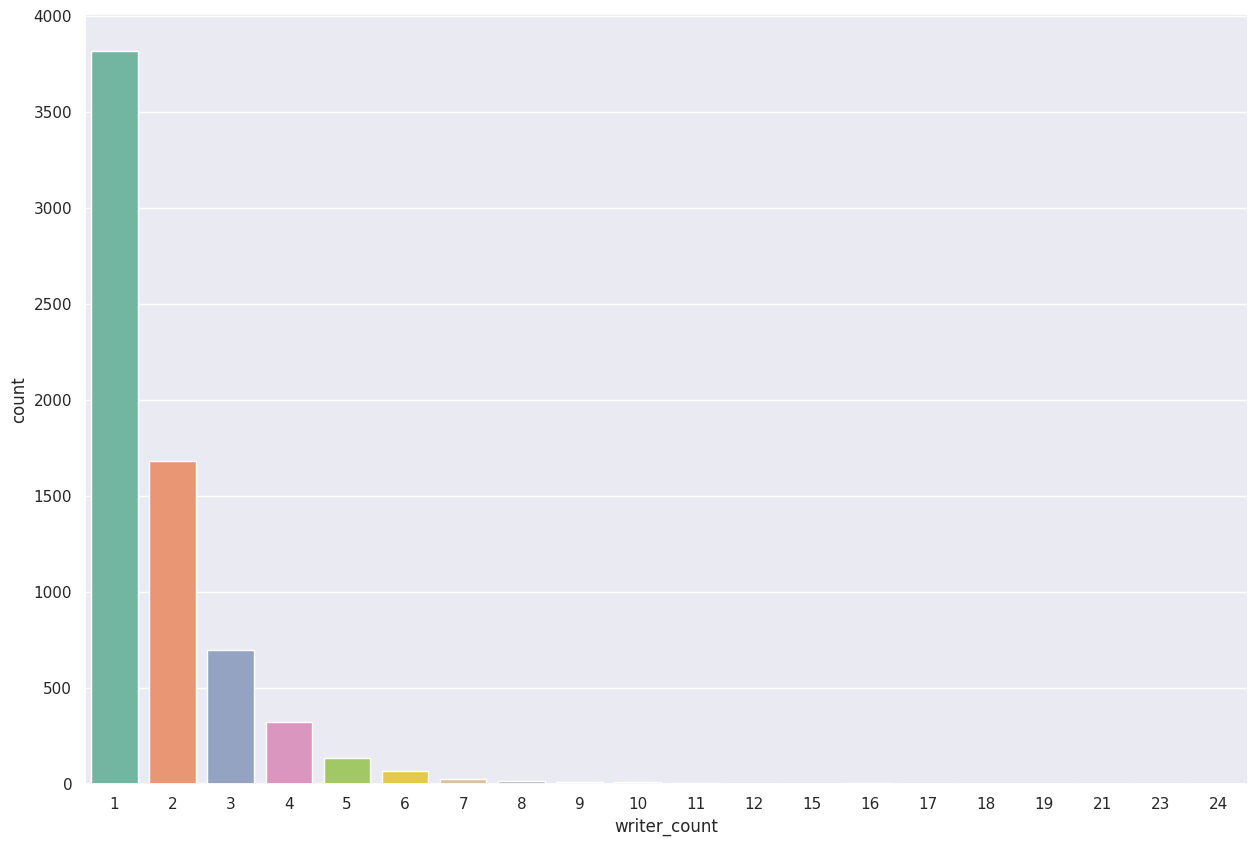

In [77]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='writer_count',data=writer_count, palette='Set2')
#max_ticks = writer_count.writer_count.value_counts().max()
#ax.set_yticks(np.arange(0,max_ticks+1))

In [78]:
participate_writer = writer_data.groupby('writer')['item'].count()
print(f'가장 적은 작품에 참여한 writer : {participate_writer.min()}')
print(f"가장 많은 작품에 참여한 writer : {participate_writer.max()}")
print(f"writer가 참여한 평균 작품의 수 : {participate_writer.mean():.2f}")

가장 적은 작품에 참여한 writer : 2
가장 많은 작품에 참여한 writer : 47
writer가 참여한 평균 작품의 수 : 3.78


# 작가 추정

In [79]:
display(title_writer[title_writer.writer=='nm0460141'])
display(title_writer[title_writer.writer=='nm0746830'])

,title,writer


,title,writer


In [80]:
title_writer[title_writer.title.str.contains('Harry Potter')]

,title,writer
2666,Harry Potter and the Chamber of Secrets (2002),"{nm0746830, nm0460141}"
2667,Harry Potter and the Deathly Hallows: Part 1 (...,"{nm0746830, nm0460141}"
2668,Harry Potter and the Deathly Hallows: Part 2 (...,"{nm0746830, nm0460141}"
2669,Harry Potter and the Goblet of Fire (2005),"{nm0746830, nm0460141}"
2670,Harry Potter and the Half-Blood Prince (2009),"{nm0746830, nm0460141}"
2671,Harry Potter and the Order of the Phoenix (2007),"{nm0325533, nm0746830}"
2672,Harry Potter and the Prisoner of Azkaban (2004),"{nm0746830, nm0460141}"
2673,Harry Potter and the Sorcerer's Stone (a.k.a. ...,"{nm0746830, nm0460141}"


- **Harry potter에 참여한 작가는 2명, 다음으로 추정**<br/>
**nm0460141 : 스티브 클로브스</br>**
**nm0746830 : J. K. 롤링**